<a href="https://colab.research.google.com/github/julian-masdatascience/ML/blob/master/ML_Supervisado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML - Supervisado

Las librerias más utilizadas son scikit-learn, TensorFlow y keras

### Lets Go!!

In [1]:
## Se importan las librerias
from sklearn import datasets 
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
## cargamos un dataset de la libreria sklearn
ds = datasets.load_iris()

In [3]:
type(ds)

sklearn.utils.Bunch

In [4]:
ds.data.shape

(150, 4)

In [5]:
ds.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## Ahora comienza la gestión de los datos que necesitamos para generar una ML - Supervisada

In [6]:
X = ds.data  
y = ds.target
df = pd.DataFrame(X, columns=ds.feature_names) 
print(df.sample(10))

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
52                 6.9               3.1                4.9               1.5
45                 4.8               3.0                1.4               0.3
69                 5.6               2.5                3.9               1.1
144                6.7               3.3                5.7               2.5
60                 5.0               2.0                3.5               1.0
33                 5.5               4.2                1.4               0.2
79                 5.7               2.6                3.5               1.0
41                 4.5               2.3                1.3               0.3
84                 5.4               3.0                4.5               1.5
11                 4.8               3.4                1.6               0.2


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f03b4514630>,
      dtype=object)

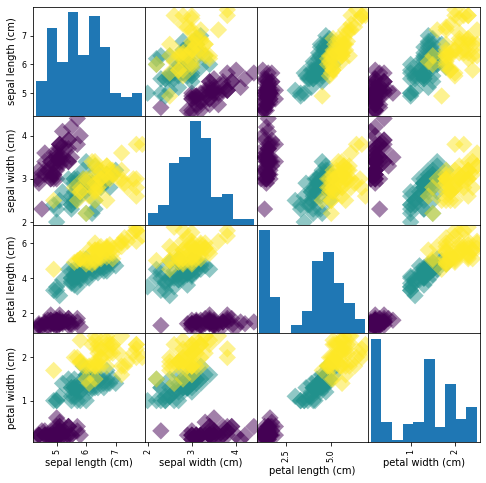

In [7]:
pd.plotting.scatter_matrix(df, c = y, figsize = [8, 8],s=150, marker = 'D')

## 1. K-NN: Intuición

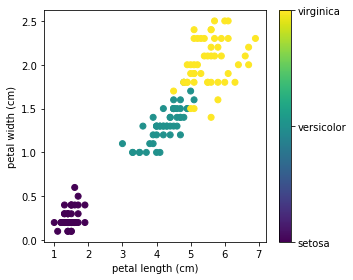

In [8]:
iris = datasets.load_iris()


# The indices of the features that we are plotting
x_index = 2
y_index = 3

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.figure(figsize=(5, 4))
plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])

plt.tight_layout()
plt.show()

### Usemos las funciones 

#### Fit / Predict

In [9]:
from sklearn.neighbors import KNeighborsClassifier  
# se crea el modelo 
knn = KNeighborsClassifier(n_neighbors=6) 
# se ajusta el modelo a los datos 
knn.fit(iris['data'], iris['target'])


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [10]:
# datos
iris.data.shape

(150, 4)

In [11]:
# objetivo
iris.target.shape

(150,)

In [12]:
# se definen nuevos valores 
valores =[[5.4, 3.6, 3.4, 1.2]]
predice = knn.predict(valores)
print('Predicción: {}'.format(predice))

Predicción: [1]


#### Train / Set

In [13]:
from sklearn.model_selection import train_test_split  
# se generarán los set de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)
print(X_train.shape)
print(y_train.shape)
print("-"*10)
print(X_test.shape)
print(y_test.shape)
print("-"*10)

(105, 4)
(105,)
----------
(45, 4)
(45,)
----------


In [14]:
# se crea el modelo 
knn = KNeighborsClassifier(n_neighbors=8)  
# se ajusta con train
knn.fit(X_train, y_train)
# se comprueba con test
y_pred = knn.predict(X_test)
print("Test set predictions: {}".format(y_pred))

Test set predictions: [1 0 0 0 1 1 0 1 0 0 1 1 2 2 0 2 1 1 0 2 2 1 2 1 0 1 0 0 1 2 0 2 1 0 1 1 1
 2 0 2 2 2 2 1 2]


## 2. Regresión 

In [15]:
datos_boston = datasets.load_boston()
df = pd.DataFrame(datos_boston.data, columns=datos_boston.feature_names)
df['target'] = pd.Series(datos_boston.target)
df.head()

CRIM    ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO       B  LSTAT  target
0  0.00632  18.0   2.31   0.0  0.538  ...  296.0     15.3  396.90   4.98    24.0
1  0.02731   0.0   7.07   0.0  0.469  ...  242.0     17.8  396.90   9.14    21.6
2  0.02729   0.0   7.07   0.0  0.469  ...  242.0     17.8  392.83   4.03    34.7
3  0.03237   0.0   2.18   0.0  0.458  ...  222.0     18.7  394.63   2.94    33.4
4  0.06905   0.0   2.18   0.0  0.458  ...  222.0     18.7  396.90   5.33    36.2

[5 rows x 14 columns]

### 2.1 Definio datos y target

In [0]:
X = df.drop('target', axis=1).values   
y = df['target'].values

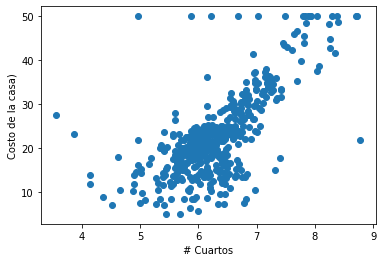

In [17]:
## visualizo los datos
x_cuartos = X[:,5]       
plt.scatter(x_cuartos, y)  
plt.ylabel('Costo de la casa)')  
plt.xlabel('# Cuartos') 
plt.show()

### 2.2 Genero el modelo 

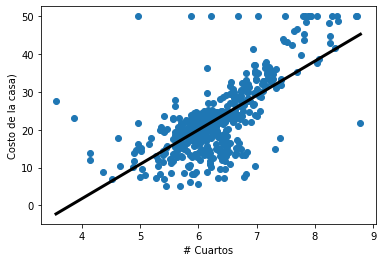

In [18]:
import numpy as np
from sklearn.linear_model import LinearRegression
# Defino el modelo 
reg = LinearRegression() 
# Ajusto lova lores
reg.fit(x_cuartos.reshape(-1, 1), y.reshape(-1, 1))
# creo la linea 
prediction_space = np.linspace(min(x_cuartos),max(x_cuartos)).reshape(-1, 1)
plt.scatter(x_cuartos, y)  
plt.plot(prediction_space, reg.predict(prediction_space),color='black', linewidth=3)
plt.ylabel('Costo de la casa)')  
plt.xlabel('# Cuartos') 
plt.show()

### 3. Regresión con multiples variables

En 4 pasos

In [0]:
# Paso 1- la librerias y datos que necesitamos 
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression
from sklearn import datasets
import pandas as pd
# cargo los datos 
datos = datasets.load_wine()
df = pd.DataFrame(datos.data, columns=datos.feature_names)
df['target'] = pd.Series(datos.target)

In [20]:
df.head()

alcohol  malic_acid   ash  ...  od280/od315_of_diluted_wines  proline  target
0    14.23        1.71  2.43  ...                          3.92   1065.0       0
1    13.20        1.78  2.14  ...                          3.40   1050.0       0
2    13.16        2.36  2.67  ...                          3.17   1185.0       0
3    14.37        1.95  2.50  ...                          3.45   1480.0       0
4    13.24        2.59  2.87  ...                          2.93    735.0       0

[5 rows x 14 columns]

In [0]:
# Paso 2 Genero mis datos de entrenamiento y rpuebas 
X = datos.data
y = datos.target
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size = 0.3, random_state=42)

In [0]:
# Paso 3 - Creo mi modelo de regresión exactament eigual que tuvieramos un solo dato
regresion = LinearRegression()
regresion.fit(X_train, y_train)  
y_pred = regresion.predict(X_test)

In [23]:
# Paso 4 - Compruebo los resultados
regresion.score(X_test, y_test)

0.9007762333580169

### 4. Validación cruzada

In [0]:
# Paso 1 - Importamos librerias
from sklearn.model_selection import cross_val_score  
from sklearn.linear_model import LinearRegression


In [30]:
reg = LinearRegression()
cv_results = cross_val_score(reg, X, y, cv=5)  
print(cv_results)


[0.         0.51460008 0.         0.40252695 0.        ]


In [31]:
np.mean(cv_results)


0.18342540559425508

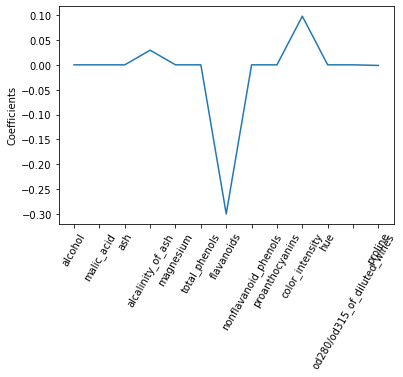

In [36]:
from sklearn.linear_model import Lasso
names = df.drop('target', axis=1).columns  
lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X, y).coef_
_ = plt.plot(range(len(names)), lasso_coef)
_ = plt.xticks(range(len(names)), names, rotation=60)
_ = plt.ylabel('Coefficients')  
plt.show()
